## 0. Import Libraries

In [2]:
from shapely.geometry import mapping
from cartopy.feature import ShapelyFeature
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import BoundaryNorm, ListedColormap

import xarray as xr
import numpy as np
import geopandas as gpd
import pandas as pd
import cartopy.io.shapereader as shpreader 
import matplotlib.pyplot as plt

import cartopy
import utils
import proplot
import matplotlib

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 1. General Options

In [4]:
# bias algorithm
bias_algo = 'QDM_era5land'
season = 'DJF' # DJF or JJA
return_period = 20 # years
investigating_var = 'return_value' # or location or nllh

# general data path
path_general = fr'/mnt/e/JupyterLab/Yuksek_Lisans/msc_thesis_data'

# variable name
name_variable_cosmo = 'TOT_PREC'
path_save = fr'{path_general}/data/{name_variable_cosmo}/'

turkey_bool = xr.open_dataset(fr"{path_save}/cosmo/BC/vectorized_turkey_mask_from_era5land.nc").rename({'Tw':investigating_var})

### 1.1 Functions

In [5]:
def return_unique_options(season, time_resample):
    
    # path for resampling information
    if time_resample != 1:
        path_resample = fr'{time_resample}hrsum'
    else:
        path_resample = fr'{time_resample}hr'
        
    return season, time_resample, path_resample

def interp_data(data):
    return data.interpolate_na(dim='rlat', method="linear").interpolate_na(dim='rlon', method="linear")

def get_clev_norm(cmap, lower, upper, interval):
    
    clevs = np.arange(lower,
                      upper,
                      interval
                      )

    norm = BoundaryNorm(clevs,
                        ncolors=cmap.N, 
                        clip=True
                        )
    
    return clevs, norm

## 2. Open Index Data

### 2.1 Intensity Indices

#### 2.1.1 Reference

In [6]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'rx{time_resample}hr'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
intensity_idx_ref = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

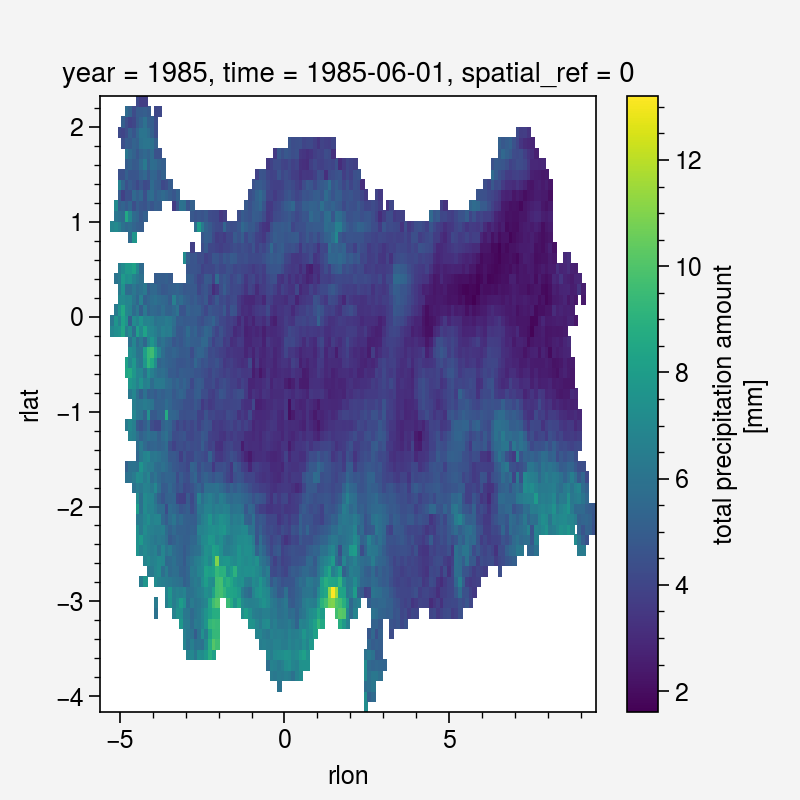

In [7]:
intensity_idx_ref.plot()

#### 2.1.2 Projection_0

In [8]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'rx{time_resample}hr'
time_frame = '206101_208012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
intensity_idx_proj_0 = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

#### 2.1.3 Projection

In [9]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'rx{time_resample}hr'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
intensity_idx_proj = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

### 2.2 Frequency - Percentile Indices

#### 2.2.1 Reference

In [10]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'R{time_resample}hr0.95P'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
freq_perc_idx_ref = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

#### 2.2.2 Projection_0

In [11]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'R{time_resample}hr0.95P'
time_frame = '206101_208012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
freq_perc_idx_proj_0 = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

#### 2.2.3 Projection

In [12]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'R{time_resample}hr0.95P'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
freq_perc_idx_proj = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

### 2.3 Frequency - Absolute Indices

#### 2.3.1 Reference

In [13]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
#heavy_rain = 4 * time_resample # 4mm times the resample period
wet_hours = 0.1 #mm
indice_name = fr'R{time_resample}hr{wet_hours}mm'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
freq_abs_idx_ref = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

#### 2.3.2 Projection_0

In [14]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
#heavy_rain = 4 * time_resample # 4mm times the resample period
wet_hours = 0.1 #mm
indice_name = fr'R{time_resample}hr{wet_hours}mm'
time_frame = '206101_208012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
freq_abs_idx_proj_0 = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

#### 2.3.3 Projection

In [15]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
#heavy_rain = 4 * time_resample # 4mm times the resample period
wet_hours = 0.1 #mm
indice_name = fr'R{time_resample}hr{wet_hours}mm'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
freq_abs_idx_proj = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

### 2.4 Persistence - Percentile Indices

#### 2.4.1 Reference

In [16]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'M{time_resample}hrCW0.95P'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
pers_perc_idx_ref = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

#### 2.4.2 Projection_0

In [17]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'M{time_resample}hrCW0.95P'
time_frame = '206101_208012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
pers_perc_idx_proj_0 = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

#### 2.4.3 Projection

In [18]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
indice_name = fr'M{time_resample}hrCW0.95P'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
pers_perc_idx_proj = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

### 2.5 Persistence - Absolute Indices

#### 2.5.1 Reference

In [19]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
#heavy_rain = 4 * time_resample # 4mm times the resample period
wet_hours = 0.1 #mm
indice_name = fr'M{time_resample}hrCW{wet_hours}mm'
time_frame = '198501_200512' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
pers_abs_idx_ref = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

#### 2.5.2 Projection_0

In [20]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
#heavy_rain = 4 * time_resample # 4mm times the resample period
wet_hours = 0.1 #mm
indice_name = fr'M{time_resample}hrCW{wet_hours}mm'
time_frame = '206101_208012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
pers_abs_idx_proj_0 = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

#### 2.5.3 Projection

In [21]:
# uique options
season, time_resample, path_resample = return_unique_options(season, 1)
#heavy_rain = 4 * time_resample # 4mm times the resample period
wet_hours = 0.1 #mm
indice_name = fr'M{time_resample}hrCW{wet_hours}mm'
time_frame = '208101_210012' # 208101_210012 for proj or 198501_200512 for reference

# open data
path = fr"{path_save}/cosmo/BC/GEV/BC_{bias_algo}_Tr011_MPI_RF_PR_{season}_{path_resample}_{indice_name}_GEV_stationary_{return_period}_{time_frame}.nc"
pers_abs_idx_proj = interp_data(xr.open_dataset(path)).where(turkey_bool==1)[investigating_var]

## 3. Visualize

### 3.1 Options

In [22]:
# Parameters to change (plot) -------------------

# projection
lcc = utils.get_proj_info_model()

# variable and dimension names
name_var = investigating_var
name_lon = 'rlon'
name_lat = 'rlat'

col_names = [
    'Intensity',
    'Freq-Percentile',
    'Freq-Absolute',
    'Pers-Percentile',
    'Pers-Absolute',
]


idx_names = [fr'Rx{time_resample}hr', 
             fr'R{time_resample}hr0.95P',
             fr'R{time_resample}hr{wet_hours}mm',
             fr'M{time_resample}hrCW0.95P',
             fr'M{time_resample}hrCW{wet_hours}mm'
             ]

# cmap for diffs
cmap_diff = proplot.Colormap('ColdHot_r')
ticks_diff = [-100, 0, 100]
clevs_diff, norm_diff = get_clev_norm(cmap_diff, -100, 100.1, 20)
label = '%'
extend = 'both'

#### 3.1.1 Intensity Colormap

In [23]:
# CMAPS
# cmap for intensity
cmap_intensity = matplotlib.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:E0453D-8.6:E07F3D-17:0FF020-34:0FF0B3-50:0F85F0-75:0600BC-100:9801D9
    (0.000, (0.878, 0.271, 0.239)),
    (0.086, (0.878, 0.498, 0.239)),
    (0.170, (0.059, 0.941, 0.125)),
    (0.340, (0.059, 0.941, 0.702)),
    (0.500, (0.059, 0.522, 0.941)),
    (0.750, (0.024, 0.000, 0.737)),
    (1.000, (0.596, 0.004, 0.851))))

#### 3.1.2 Frequency Colormap

In [24]:
# cmap for freq perc
cmap_freq_perc = matplotlib.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:1F4E5A-15:029C8E-50:FFDB69-76.3:FFA658-89:EA5F40-100:9C8981
    (0.000, (0.122, 0.306, 0.353)),
    (0.150, (0.008, 0.612, 0.557)),
    (0.500, (1.000, 0.859, 0.412)),
    (0.763, (1.000, 0.651, 0.345)),
    (0.890, (0.918, 0.373, 0.251)),
    (1.000, (0.612, 0.537, 0.506)))).reversed()

In [25]:
# cmap for freq abs
cmap_freq_abs = matplotlib.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#0:1F4E5A-15:029C8E-50:FFDB69-76.3:FFA658-89:EA5F40-100:9C8981
    (0.000, (0.122, 0.306, 0.353)),
    (0.150, (0.008, 0.612, 0.557)),
    (0.500, (1.000, 0.859, 0.412)),
    (0.763, (1.000, 0.651, 0.345)),
    (0.890, (0.918, 0.373, 0.251)),
    (1.000, (0.612, 0.537, 0.506)))).reversed()

#### 3.1.3 Persistence Colormap

In [26]:
# cmap for persistence perc
cmap_pers_perc = matplotlib.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#780462-000000-090979-00D4FF-BAD7DD
    (0.000, (0.471, 0.016, 0.384)),
    (0.250, (0.000, 0.000, 0.000)),
    (0.500, (0.035, 0.035, 0.475)),
    (0.750, (0.000, 0.831, 1.000)),
    (1.000, (0.729, 0.843, 0.867)))).reversed()

In [27]:
# cmap for persistence abs
cmap_pers_abs = matplotlib.colors.LinearSegmentedColormap.from_list('my_gradient', (
    # Edit this gradient at https://eltos.github.io/gradient/#780462-000000-090979-00D4FF-BAD7DD
    (0.000, (0.471, 0.016, 0.384)),
    (0.250, (0.000, 0.000, 0.000)),
    (0.500, (0.035, 0.035, 0.475)),
    (0.750, (0.000, 0.831, 1.000)),
    (1.000, (0.729, 0.843, 0.867)))).reversed()

### 3.2 Original GEV - Plot

/tmp/ipykernel_768/1150269576.py:14: ProplotWarning: Ignoring unused projection-specific format() keyword argument(s): {'aspect': 10}
  fig, axs = proplot.subplots(fig_array,
/tmp/ipykernel_768/1150269576.py:270: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.set_aspect('equal')
/tmp/ipykernel_768/1150269576.py:273: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.axis('off')
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be pa

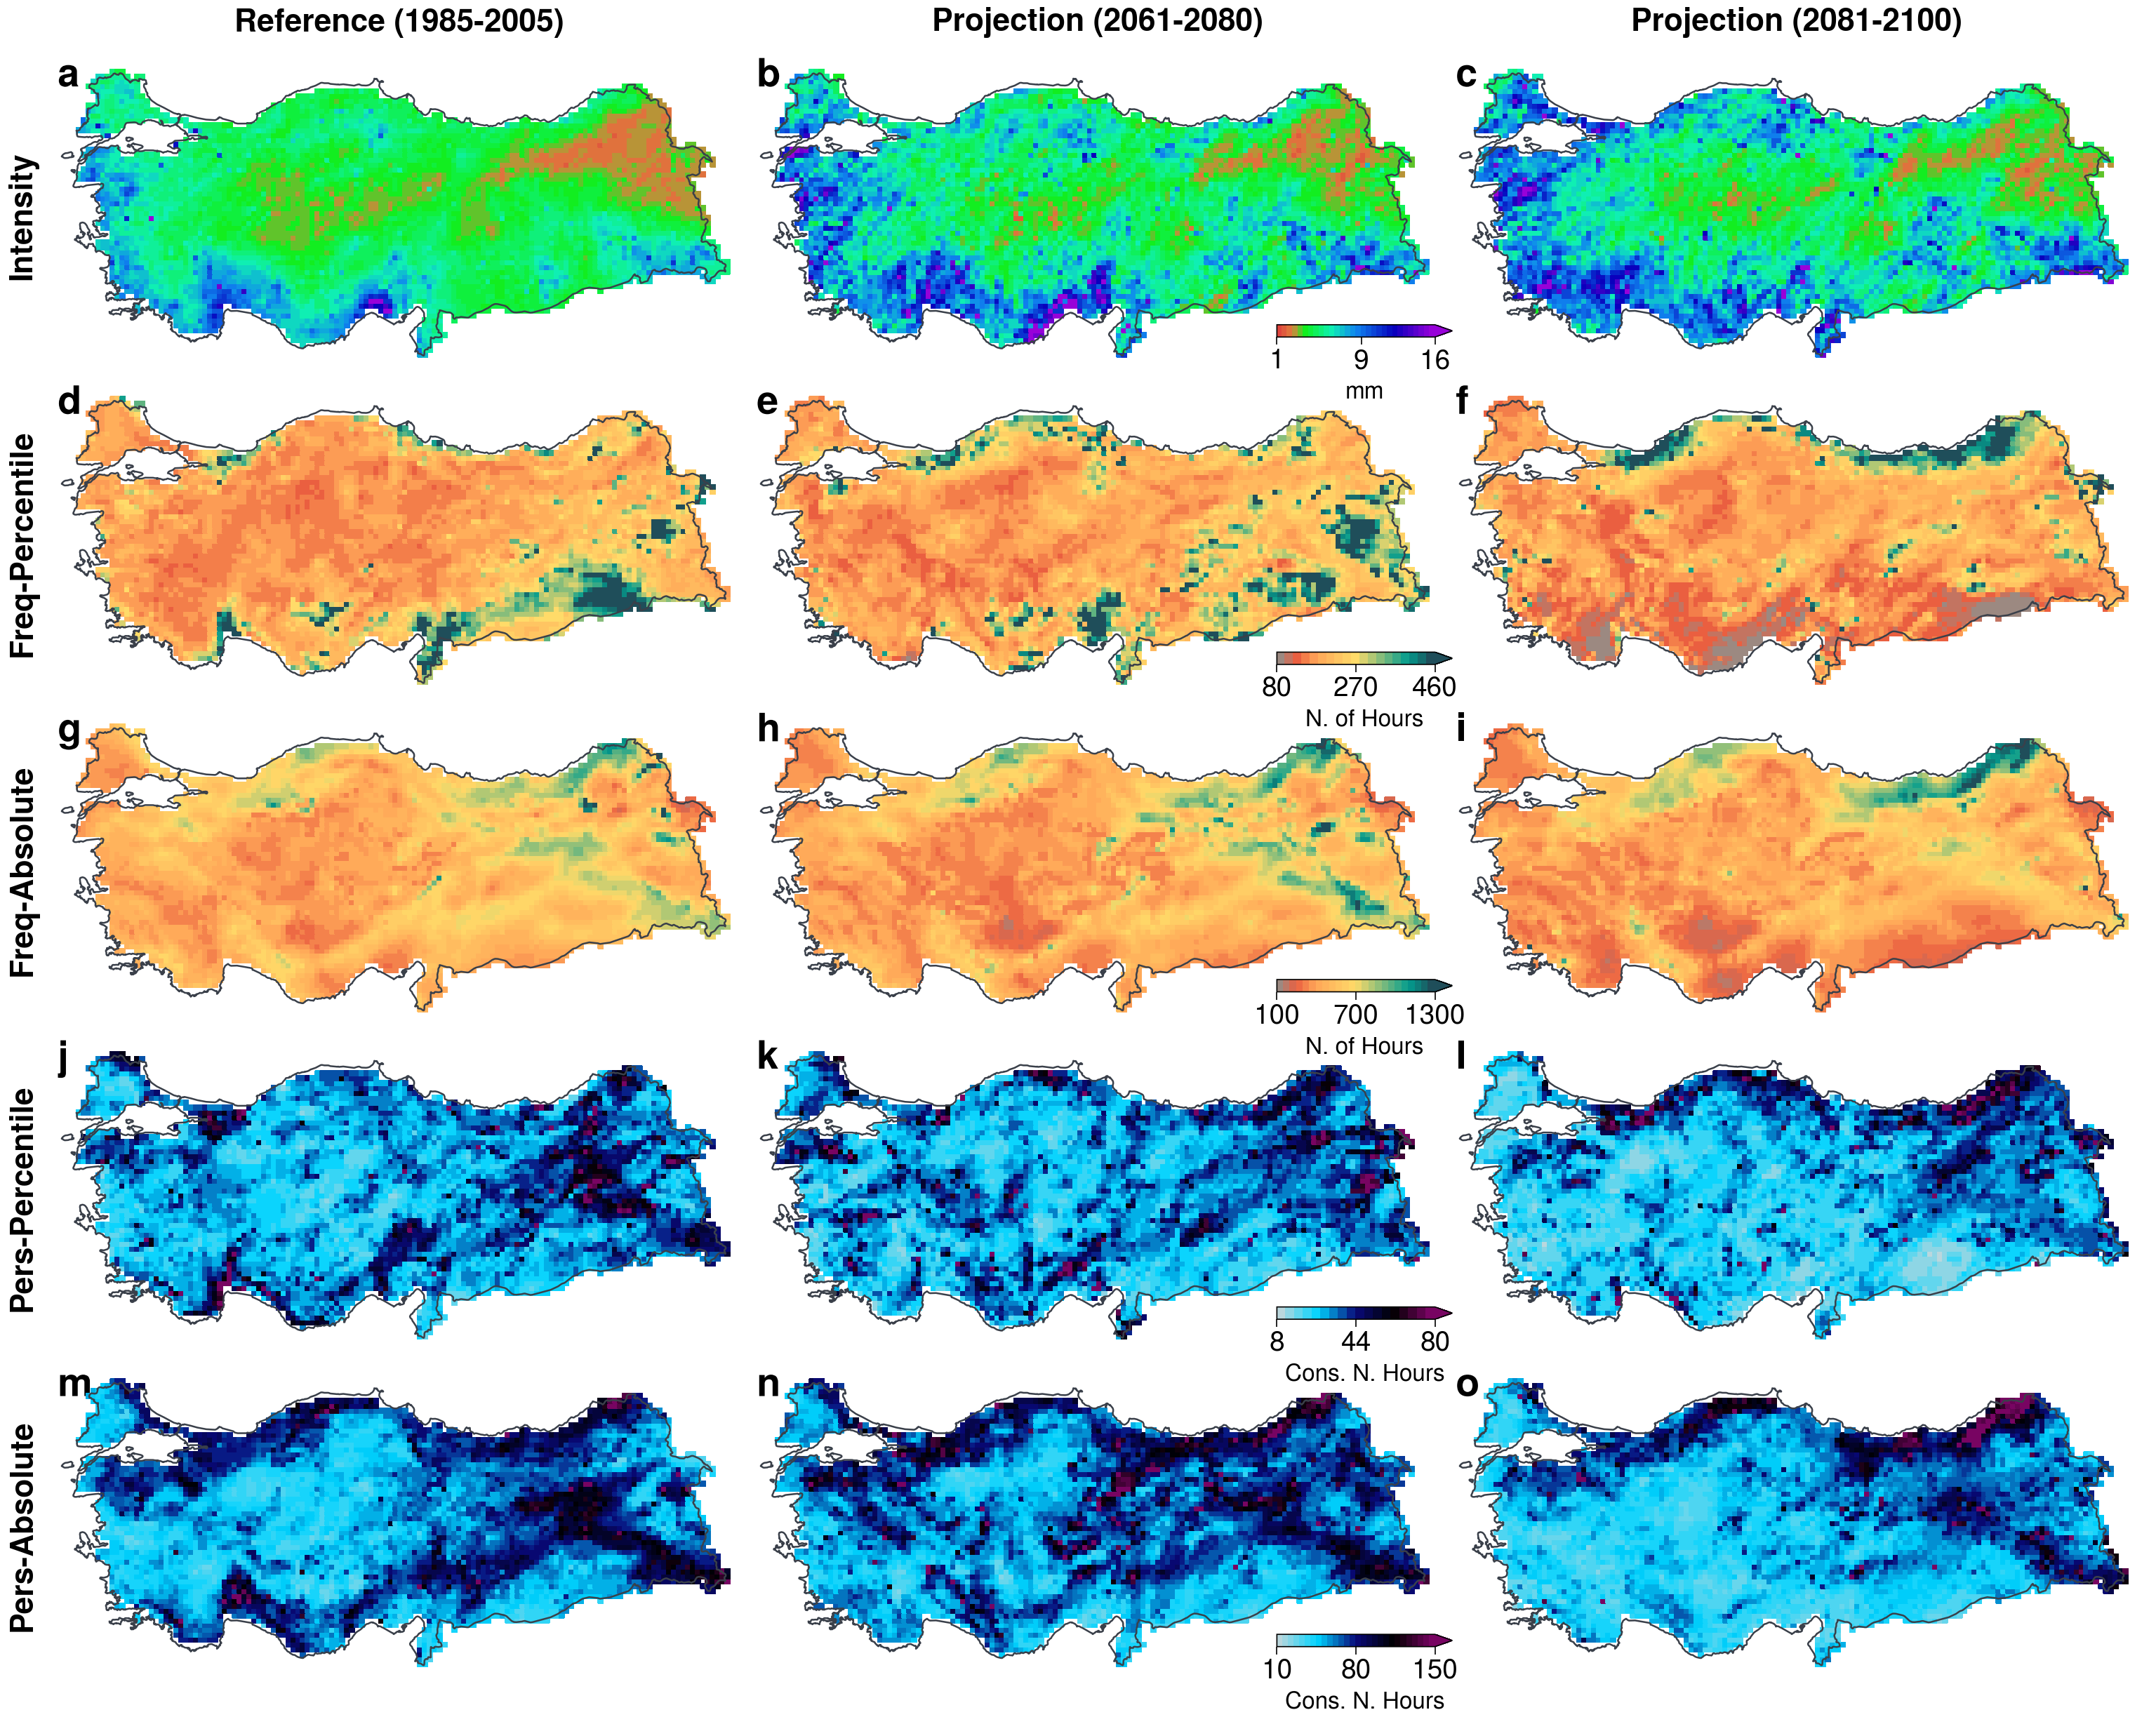

In [46]:
#%%capture
# fig features
fig_array = [[1, 2, 3],
             [4, 5, 6],
             [7, 8, 9],
             [10, 11, 12],
             [13, 14, 15]
            ]

# graphic number
graphic_no = 15

# Create Figure -------------------------
fig, axs = proplot.subplots(fig_array, 
                            aspect=10,
                            axwidth=5,
                            proj=lcc,
                            hratios=tuple(np.ones(len(fig_array), dtype=int)),
                            includepanels=True,
                            hspace=-0.46,
                            wspace=-0.16,
                            sharey=0
                           )

# format whole figure
axs.format(abcloc='ul',
           #abcbbox = True,
           abc_kw={'size':20},
           abc=True,
           zorder=50
          )

# Turkey limits
axs.format(lonlim=(25.8, 45.1), 
           latlim=(35., 42.2), 
           longrid=False, 
           latgrid = False
          )

# format headers
axs.format(rowlabels=col_names,
           collabels=['Reference (1985-2005)',
                      'Projection (2061-2080)',
                      'Projection (2081-2100)'
                     ],
           leftlabelsize=16,
           toplabelsize=16,
            
          )

# format headers
#axs.format(rowlabels=col_names,
#           collabels=[fr'Reference - {season}', 
#                      fr'Projection - {season}']
#          )

# geographic axes
utils.plot_geographic_features(axs, 
                               graphic_no
                              )#

# meshes a and b and c
for idx in range(3):
    
    if return_period == 20:
        clevs_intensity, norm_intensity = get_clev_norm(cmap_intensity, 1, 12.5, 0.5)
        ticks_intensity = [1, 7, 12]
    elif return_period == 50:
        clevs_intensity, norm_intensity = get_clev_norm(cmap_intensity, 1, 16.5, 0.5)
        ticks_intensity = [1, 9, 16]
    
    if idx == 0:
        mesh_dt = intensity_idx_ref
    elif idx == 1:
        mesh_dt = intensity_idx_proj_0
    elif idx == 2:
        mesh_dt = intensity_idx_proj

        
    mesh_ab = axs[idx].pcolormesh(mesh_dt[name_lon],
                                  mesh_dt[name_lat],
                                  mesh_dt,
                                  cmap=cmap_intensity,
                                  norm=norm_intensity,
                                  transform=lcc,
                                  zorder=20,
                                  extend='max'
                                 )
    # colorbar
    if idx == 1:
        axs[idx].colorbar(mesh_ab,
                     label='mm',
                     loc='lr', length=10,  # length is em widths
                     tickminor=False, alpha=0.5,
                     width=0.7,
                     labelsize = 12,
                     ticklabelsize = 14,
                     frame=False,
                     pad = -0.2,
                     ticks = ticks_intensity
                    )
        
# meshes d and e and f
for idx in range(3):
    
    if return_period == 20:
        clevs_freq_perc, norm_freq_perc = get_clev_norm(cmap_freq_perc, 80, 341, 20)
        ticks_freq_perc = [80, 210, 340]
    elif return_period == 50:
        clevs_freq_perc, norm_freq_perc = get_clev_norm(cmap_freq_perc, 80, 461, 20)
        ticks_freq_perc = [80, 270, 460]
    
    if idx == 0:
        mesh_dt = freq_perc_idx_ref
    elif idx == 1:
        mesh_dt = freq_perc_idx_proj_0
    elif idx == 2:
        mesh_dt = freq_perc_idx_proj

        
    mesh_ab = axs[idx+3].pcolormesh(mesh_dt[name_lon],
                                  mesh_dt[name_lat],
                                  mesh_dt,
                                  cmap=cmap_freq_perc,
                                  norm=norm_freq_perc,
                                  transform=lcc,
                                  zorder=20,
                                  extend='max'
                                 )
    # colorbar
    if idx == 1:
        axs[idx+3].colorbar(mesh_ab,
                     label='N. of Hours',
                     loc='lr', length=10,  # length is em widths
                     tickminor=False, alpha=0.5,
                     width=0.7,
                     labelsize = 12,
                     ticklabelsize = 14,
                     frame=False,
                     pad = -0.2,
                     ticks = ticks_freq_perc
                    )
        
# meshes g and h and i
for idx in range(3):
    
    if return_period == 20:
        clevs_freq_abs, norm_freq_abs = get_clev_norm(cmap_freq_abs, 100, 1101, 50)
        ticks_freq_abs = [100, 600, 1100]
    elif return_period == 50:
        clevs_freq_abs, norm_freq_abs = get_clev_norm(cmap_freq_abs, 100, 1301, 50)
        ticks_freq_abs = [100, 700, 1300]
    
    if idx == 0:
        mesh_dt = freq_abs_idx_ref
    elif idx == 1:
        mesh_dt = freq_abs_idx_proj_0
    elif idx == 2:
        mesh_dt = freq_abs_idx_proj

        
    mesh_ab = axs[idx+6].pcolormesh(mesh_dt[name_lon],
                                  mesh_dt[name_lat],
                                  mesh_dt,
                                  cmap=cmap_freq_abs,
                                  norm=norm_freq_abs,
                                  transform=lcc,
                                  zorder=20,
                                  extend='max'
                                 )
    # colorbar
    if idx == 1:
        axs[idx+6].colorbar(mesh_ab,
                     label='N. of Hours',
                     loc='lr', length=10,  # length is em widths
                     tickminor=False, alpha=0.5,
                     width=0.7,
                     labelsize = 12,
                     ticklabelsize = 14,
                     frame=False,
                     pad = -0.2,
                     ticks=ticks_freq_abs
                    )

# meshes j and k and l
for idx in range(3):
    
    if return_period == 20:
        clevs_pers_perc, norm_pers_perc = get_clev_norm(cmap_pers_perc, 8, 51, 4)
        ticks_pers_perc = [8, 29, 50]
        
    elif return_period == 50:
        clevs_pers_perc, norm_pers_perc = get_clev_norm(cmap_pers_perc, 8, 81, 4)
        ticks_pers_perc = [8, 44, 80]
        
    if idx == 0:
        mesh_dt = pers_perc_idx_ref
    elif idx == 1:
        mesh_dt = pers_perc_idx_proj_0
    elif idx == 2:
        mesh_dt = pers_perc_idx_proj

        
    mesh_ab = axs[idx+9].pcolormesh(mesh_dt[name_lon],
                                  mesh_dt[name_lat],
                                  mesh_dt,
                                  cmap=cmap_pers_perc,
                                  norm=norm_pers_perc,
                                  transform=lcc,
                                  zorder=20,
                                  extend='max'
                                 )
    # colorbar
    if idx == 1:
        axs[idx+9].colorbar(mesh_ab,
                     label='Cons. N. Hours',
                     loc='lr', length=10,  # length is em widths
                     tickminor=False, alpha=0.5,
                     width=0.7,
                     labelsize = 12,
                     ticklabelsize = 14,
                     frame=False,
                     pad = -0.2,
                     ticks=ticks_pers_perc
                    )

# meshes m and n and p
for idx in range(3):
    
    if return_period == 20:
        clevs_pers_abs, norm_pers_abs = get_clev_norm(cmap_pers_abs, 10, 121, 5)
        ticks_pers_abs = [10, 60, 110]
        
    elif return_period == 50:
        clevs_pers_abs, norm_pers_abs = get_clev_norm(cmap_pers_abs, 10, 151, 5)
        ticks_pers_abs = [10, 80, 150]
        
    if idx == 0:
        mesh_dt = pers_abs_idx_ref
    elif idx == 1:
        mesh_dt = pers_abs_idx_proj_0
    elif idx == 2:
        mesh_dt = pers_abs_idx_proj

        
    mesh_ab = axs[idx+12].pcolormesh(mesh_dt[name_lon],
                                  mesh_dt[name_lat],
                                  mesh_dt,
                                  cmap=cmap_pers_abs,
                                  norm=norm_pers_abs,
                                  transform=lcc,
                                  zorder=20,
                                  extend='max'
                                 )
    # colorbar
    if idx == 1:
        axs[idx+12].colorbar(mesh_ab,
                     label='Cons. N. Hours',
                     loc='lr', length=10,  # length is em widths
                     tickminor=False, alpha=0.5,
                     width=0.7,
                     labelsize = 12,
                     ticklabelsize = 14,
                     frame=False,
                     pad = -0.2,
                     ticks=ticks_pers_abs
                    )

# set the aspect ratio of the plot to "equal"
axs.set_aspect('equal')

fig.patch.set_visible(False)
axs.axis('off')

# set the background color of the figure to match the map
fig.set_facecolor('white')

#save figure
plt.savefig(fr'{path_general}/pictures/GEV_BC_indices_RL{return_period}_stationary_{season}.jpeg',
            bbox_inches='tight', optimize=True,
            progressive=True, dpi=300)

### 3.3 Difference GEV - Plot

/tmp/ipykernel_768/3601519171.py:14: ProplotWarning: Ignoring unused projection-specific format() keyword argument(s): {'aspect': 10}
  fig, axs = proplot.subplots(fig_array,
/tmp/ipykernel_768/3601519171.py:242: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.set_aspect('equal')
/tmp/ipykernel_768/3601519171.py:245: ProplotWarning: Calling arbitrary axes methods from SubplotGrid was deprecated in v0.8 and will be removed in a future release. Please index the grid or loop over the grid instead.
  axs.axis('off')
/home/donmezk16/Downloads/anaconda3/envs/AFAD/lib/python3.9/site-packages/proplot/figure.py:469: MatplotlibDeprecationWarning: 
The 'optimize' parameter of print_jpg() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use pil_kwargs={'optimize': ...} instead. If any parameter follows 'optimize', they should be pa

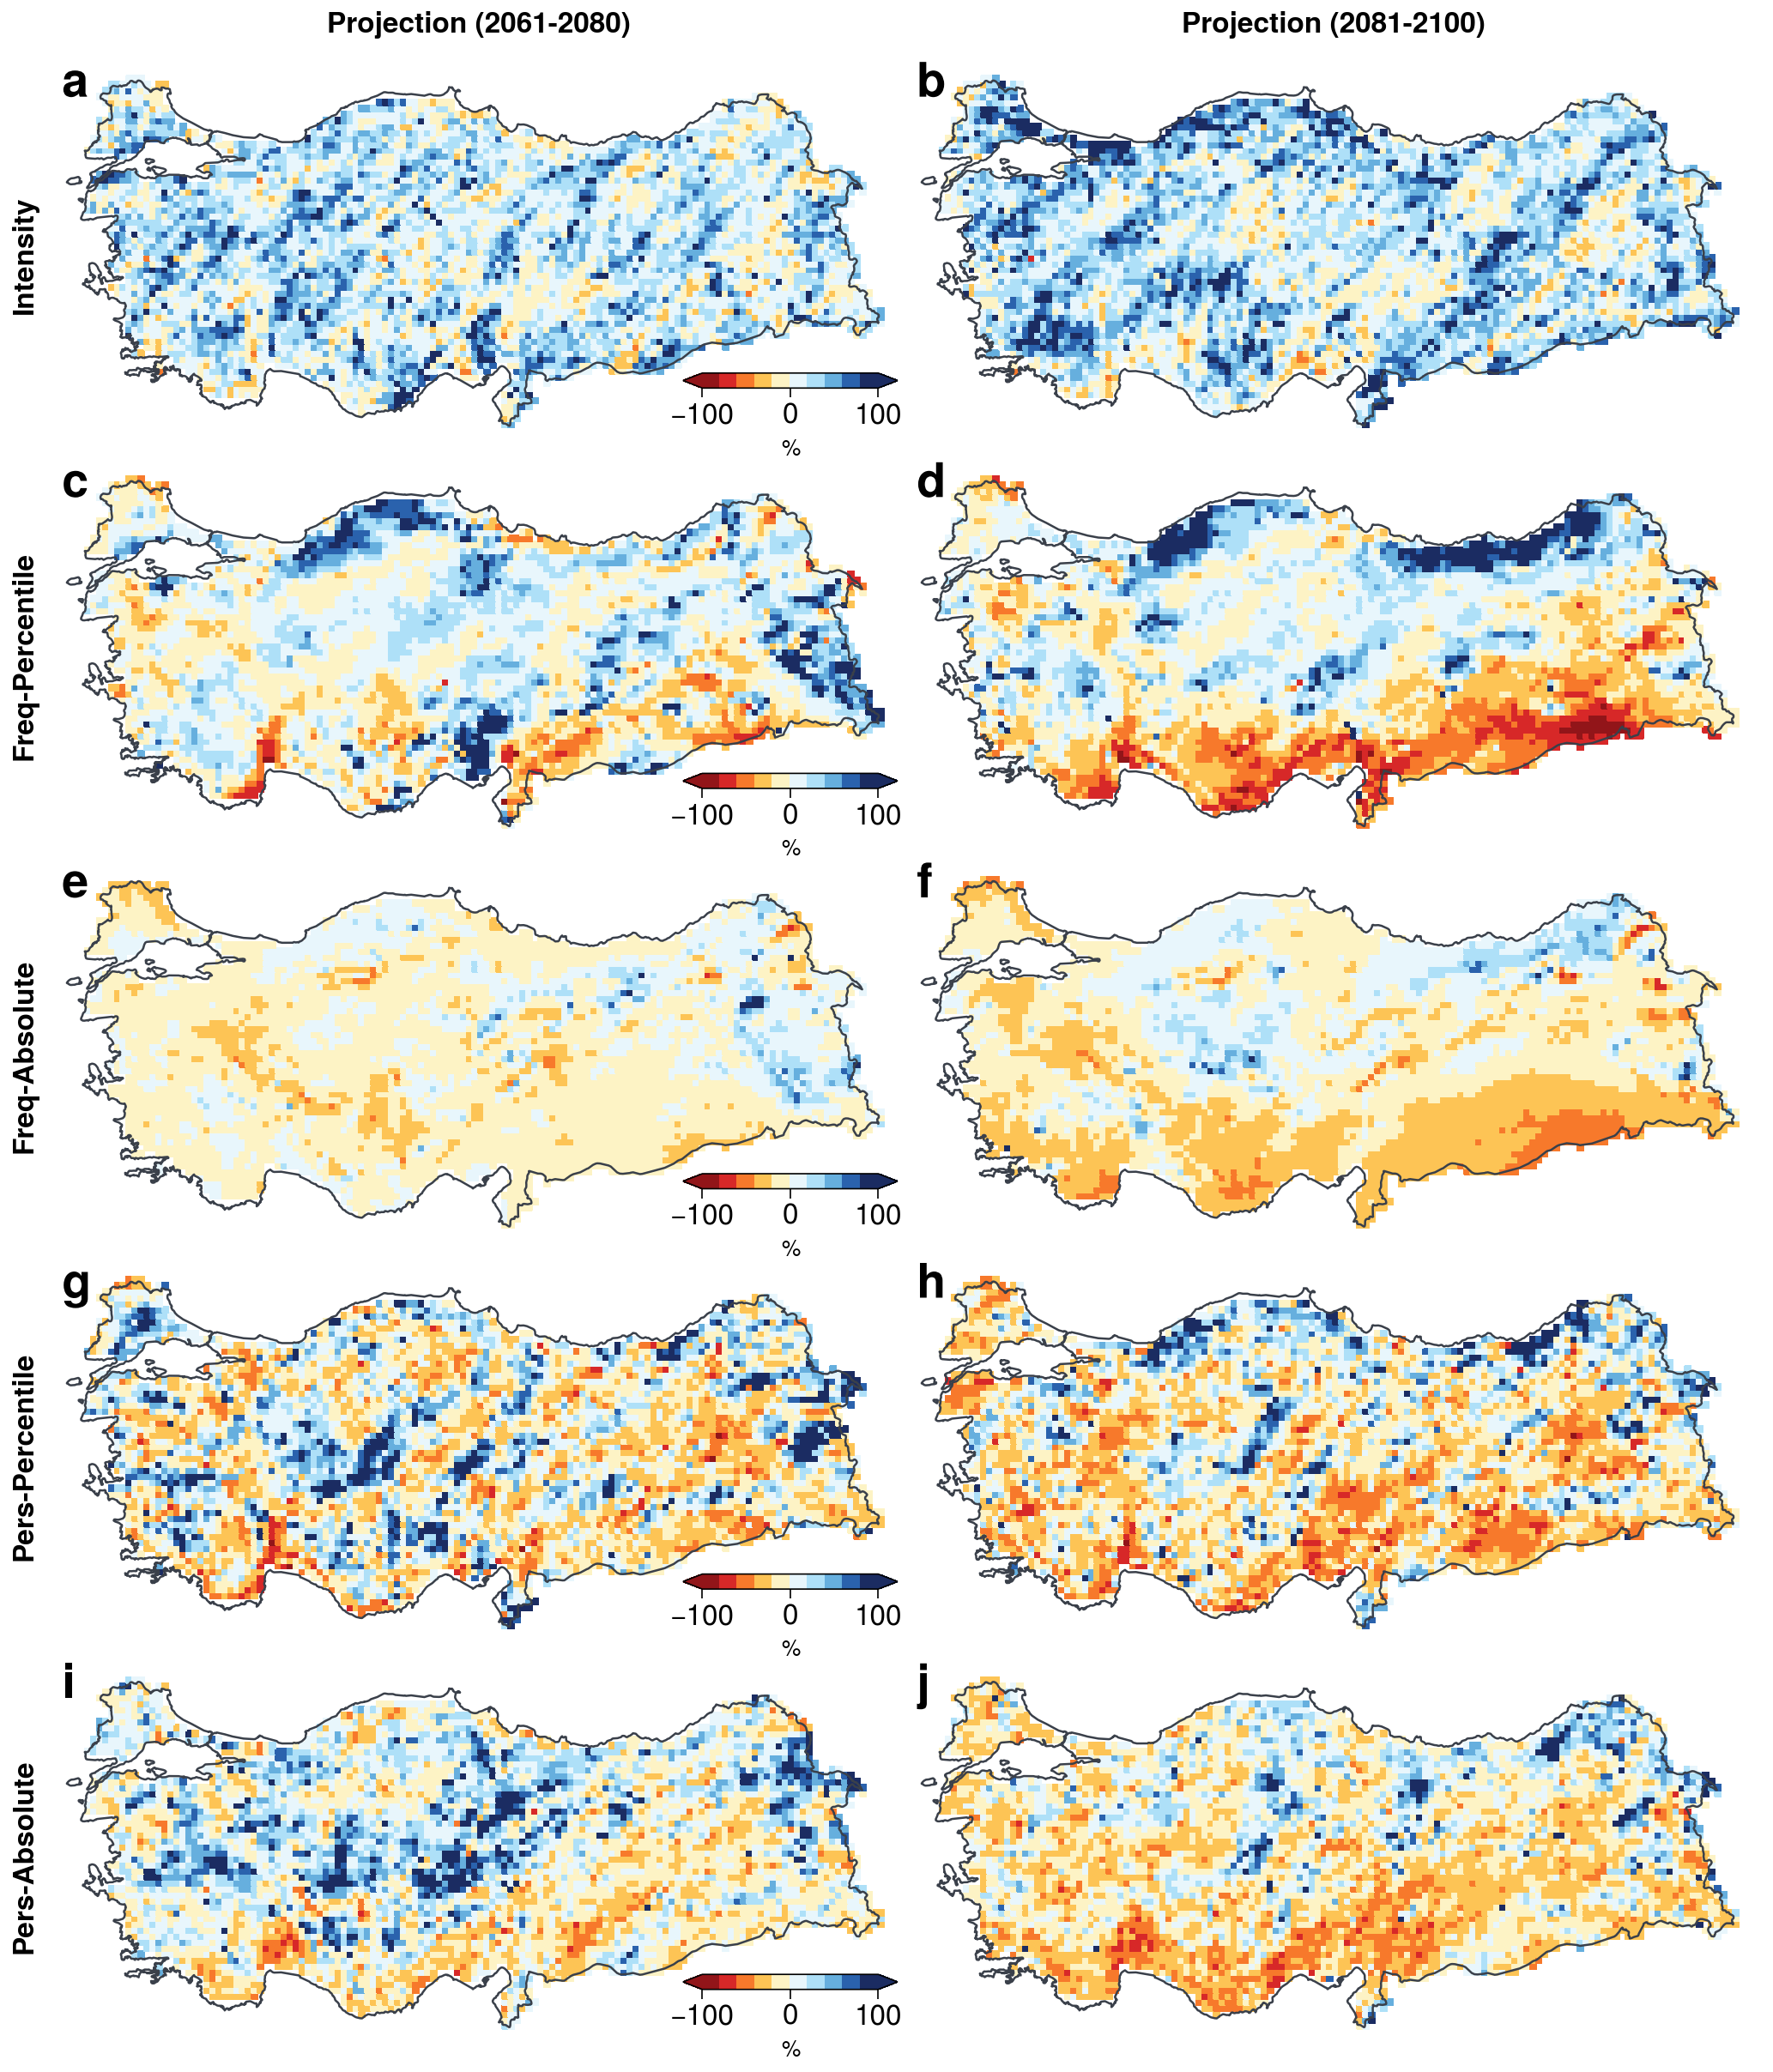

In [28]:
#%%capture
# fig features
fig_array = [[1, 2],
             [3, 4],
             [5, 6],
             [7, 8],
             [9, 10]
            ]

# graphic number
graphic_no = 10

# Create Figure -------------------------
fig, axs = proplot.subplots(fig_array, 
                            aspect=10,
                            axwidth=5,
                            proj=lcc,
                            hratios=tuple(np.ones(len(fig_array), dtype=int)),
                            includepanels=True,
                            hspace=-0.46,
                            wspace=-0.16,
                            sharey=0
                           )

# format whole figure
axs.format(abcloc='ul',
           #abcbbox = True,
           abc_kw={'size':20},
           abc=True,
           zorder=50
          )

# Turkey limits
axs.format(lonlim=(25.8, 45.1), 
           latlim=(35., 42.2), 
           longrid=False, 
           latgrid = False
          )

# format headers
axs.format(rowlabels=col_names,
           collabels=['Projection (2061-2080)',
                      'Projection (2081-2100)'
                     ],
           leftlabelsize=12,
           toplabelsize=12,
            
          )

# format headers
#axs.format(rowlabels=col_names,
#           collabels=[fr'Reference - {season}', 
#                      fr'Projection - {season}']
#          )

# geographic axes
utils.plot_geographic_features(axs, 
                               graphic_no
                              )#

# for a and b
for idx in range(2):
    
    if idx == 0:
        mesh_dt = ((intensity_idx_proj_0 - 
                     intensity_idx_ref
                    )/intensity_idx_ref)*1e2
    elif idx == 1:
        mesh_dt = ((intensity_idx_proj - 
                     intensity_idx_ref
                    )/intensity_idx_ref)*1e2

        
    mesh_ab = axs[idx].pcolormesh(mesh_dt[name_lon],
                                  mesh_dt[name_lat],
                                  mesh_dt,
                                  cmap=cmap_diff,
                                  norm=norm_diff,
                                  transform=lcc,
                                  zorder=20,
                                  extend='both'
                                 )
    # colorbar
    if idx==0:
        axs[idx].colorbar(mesh_ab,
                     label=label,
                     loc='lr', length=10,  # length is em widths
                     tickminor=False, alpha=0.5,
                     width=0.7,
                     labelsize = 9,
                     ticklabelsize = 12,
                     frame=False,
                     pad = 0.5,
                     ticks = ticks_diff
                    )
        
# for c and d
for idx in range(2):
    
    if idx == 0:
        mesh_dt = ((freq_perc_idx_proj_0 - 
                     freq_perc_idx_ref
                    )/freq_perc_idx_ref)*1e2
    elif idx == 1:
        mesh_dt = ((freq_perc_idx_proj - 
                     freq_perc_idx_ref
                    )/freq_perc_idx_ref)*1e2

        
    mesh_ab = axs[idx+2].pcolormesh(mesh_dt[name_lon],
                                  mesh_dt[name_lat],
                                  mesh_dt,
                                  cmap=cmap_diff,
                                  norm=norm_diff,
                                  transform=lcc,
                                  zorder=20,
                                  extend='both'
                                 )
    # colorbar
    if idx==0:
        axs[idx+2].colorbar(mesh_ab,
                     label=label,
                     loc='lr', length=10,  # length is em widths
                     tickminor=False, alpha=0.5,
                     width=0.7,
                     labelsize = 9,
                     ticklabelsize = 12,
                     frame=False,
                     pad = 0.5,
                     ticks = ticks_diff
                    )
        
# for e and f
for idx in range(2):
    
    if idx == 0:
        mesh_dt = ((freq_abs_idx_proj_0 - 
                     freq_abs_idx_ref
                    )/freq_abs_idx_ref)*1e2
    elif idx == 1:
        mesh_dt = ((freq_abs_idx_proj - 
                     freq_abs_idx_ref
                    )/freq_abs_idx_ref)*1e2

        
    mesh_ab = axs[idx+4].pcolormesh(mesh_dt[name_lon],
                                  mesh_dt[name_lat],
                                  mesh_dt,
                                  cmap=cmap_diff,
                                  norm=norm_diff,
                                  transform=lcc,
                                  zorder=20,
                                  extend='both'
                                 )
    # colorbar
    if idx==0:
        axs[idx+4].colorbar(mesh_ab,
                     label=label,
                     loc='lr', length=10,  # length is em widths
                     tickminor=False, alpha=0.5,
                     width=0.7,
                     labelsize = 9,
                     ticklabelsize = 12,
                     frame=False,
                     pad = 0.5,
                     ticks = ticks_diff
                    )
        
# for g and h
for idx in range(2):
    
    if idx == 0:
        mesh_dt = ((pers_perc_idx_proj_0 - 
                     pers_perc_idx_ref
                    )/pers_perc_idx_ref)*1e2
    elif idx == 1:
        mesh_dt = ((pers_perc_idx_proj - 
                     pers_perc_idx_ref
                    )/pers_perc_idx_ref)*1e2

        
    mesh_ab = axs[idx+6].pcolormesh(mesh_dt[name_lon],
                                  mesh_dt[name_lat],
                                  mesh_dt,
                                  cmap=cmap_diff,
                                  norm=norm_diff,
                                  transform=lcc,
                                  zorder=20,
                                  extend='both'
                                 )
    # colorbar
    if idx==0:
        axs[idx+6].colorbar(mesh_ab,
                     label=label,
                     loc='lr', length=10,  # length is em widths
                     tickminor=False, alpha=0.5,
                     width=0.7,
                     labelsize = 9,
                     ticklabelsize = 12,
                     frame=False,
                     pad = 0.5,
                     ticks = ticks_diff
                    )
        
# for i and j
for idx in range(2):
    
    if idx == 0:
        mesh_dt = ((pers_abs_idx_proj_0 - 
                     pers_abs_idx_ref
                    )/pers_abs_idx_ref)*1e2
    elif idx == 1:
        mesh_dt = ((pers_abs_idx_proj - 
                     pers_abs_idx_ref
                    )/pers_abs_idx_ref)*1e2

        
    mesh_ab = axs[idx+8].pcolormesh(mesh_dt[name_lon],
                                  mesh_dt[name_lat],
                                  mesh_dt,
                                  cmap=cmap_diff,
                                  norm=norm_diff,
                                  transform=lcc,
                                  zorder=20,
                                  extend='both'
                                 )
    # colorbar
    if idx==0:
        axs[idx+8].colorbar(mesh_ab,
                     label=label,
                     loc='lr', length=10,  # length is em widths
                     tickminor=False, alpha=0.5,
                     width=0.7,
                     labelsize = 9,
                     ticklabelsize = 12,
                     frame=False,
                     pad = 0.5,
                     ticks = ticks_diff
                    )        

# set the aspect ratio of the plot to "equal"
axs.set_aspect('equal')

fig.patch.set_visible(False)
axs.axis('off')

# set the background color of the figure to match the map
fig.set_facecolor('white')

#save figure
plt.savefig(fr'{path_general}/pictures/GEV_BC_indices_diff_RL{return_period}_stationary_{season}.jpeg',
            bbox_inches='tight', optimize=True,
            progressive=True, dpi=300)